# RasterIO.jl Guide

## File I/O
`RasterIO.jl` provides read, read-write, and write access to raster data files and are obtained by calling one of `openraster()`, `createraster()` or `writeraster()`.

In [1]:
using RasterIO

In [2]:
raster = RasterIO.openraster("pyrasterio/RGB.byte.tif")

RasterIO.Raster(Ptr{Void} @0x00007ff3c8cf58f0,791,718,3)

## Attributes
In addition to the file-like attributes shown above, a dataset has a number of other read-only attributes that help explain its role in spatial information systems. The `height` and `width` are the number of rows and columns of the raster dataset. The `nband` attribute tells you the number of bands in the dataset.

In [3]:
raster.height, raster.width, raster.nband

(718,791,3)

You can also query for the name of the GDAL format driver used.

In [4]:
RasterIO.drivershortname(RasterIO._getdatasetdriver(raster.dataset))

"GTiff"

What makes geospatial raster datasets different from other raster files is that their pixels map to regions of the Earth. A dataset has a coordinate reference system and an affine transformation matrix that maps pixel coordinates to coordinates in that reference system.

In [5]:
RasterIO.getprojection(raster.dataset)

"PROJCS[\"UTM Zone 18, Northern Hemisphere\",GEOGCS[\"Unknown datum based upon the WGS 84 ellipsoid\",DATUM[\"Not_specified_based_on_WGS_84_spheroid\",SPHEROID[\"WGS 84\",6378137,298.257223563,AUTHORITY[\"EPSG\",\"7030\"]]],PRIMEM[\"Greenwich\",0],UNIT[\"degree\",0.0174532925199433]],PROJECTION[\"Transverse_Mercator\"],PARAMETER[\"latitude_of_origin\",0],PARAMETER[\"central_meridian\",-75],PARAMETER[\"scale_factor\",0.9996],PARAMETER[\"false_easting\",500000],PARAMETER[\"false_northing\",0],UNIT[\"metre\",1,AUTHORITY[\"EPSG\",\"9001\"]]]"

In [6]:
RasterIO.getgeotransform(raster.dataset)

6-element Array{Float64,1}:
 101985.0      
    300.038    
      0.0      
      2.82692e6
      0.0      
   -300.042    

## Reading data
Datasets generally have one or more bands (or layers). Following the GDAL convention, these are indexed starting with the number 1. The first band of a file can be read like this:

In [7]:
RasterIO.fetch(raster, 1)

791x718 Array{UInt8,2}:
 0x00  0x00  0x00  0x00  0x00  0x00  …  0x00  0x00  0x00  0x00  0x00  0x00
 0x00  0x00  0x00  0x00  0x00  0x00     0x00  0x00  0x00  0x00  0x00  0x00
 0x00  0x00  0x00  0x00  0x00  0x00     0x00  0x00  0x00  0x00  0x00  0x00
 0x00  0x00  0x00  0x00  0x00  0x00     0x00  0x00  0x00  0x00  0x00  0x00
 0x00  0x00  0x00  0x00  0x00  0x00     0x00  0x00  0x00  0x00  0x00  0x00
 0x00  0x00  0x00  0x00  0x00  0x00  …  0x00  0x00  0x00  0x00  0x00  0x00
 0x00  0x00  0x00  0x00  0x00  0x00     0x00  0x00  0x00  0x00  0x00  0x00
 0x00  0x00  0x00  0x00  0x00  0x00     0x00  0x00  0x00  0x00  0x00  0x00
 0x00  0x00  0x00  0x00  0x00  0x00     0x00  0x00  0x00  0x00  0x00  0x00
 0x00  0x00  0x00  0x00  0x00  0x00     0x00  0x00  0x00  0x00  0x00  0x00
 0x00  0x00  0x00  0x00  0x00  0x00  …  0x00  0x00  0x00  0x00  0x00  0x00
 0x00  0x00  0x00  0x00  0x00  0x00     0x00  0x00  0x00  0x00  0x00  0x00
 0x00  0x00  0x00  0x00  0x00  0x00     0x00  0x00  0x00  0x00  0x00  0x00
 

The returned object is a 2-dimensional Array. The GeoTIFF file that Rasterio uses for testing has 0 values in the corners, but has nonzero values elsewhere.

You can also fetch multiple bands by passing in a vector of indices corresponding to the bands, and get a 3-dimensional Array as the result.

In [8]:
RasterIO.fetch(raster, [1,3])

791x718x2 Array{UInt8,3}:
[:, :, 1] =
 0x00  0x00  0x00  0x00  0x00  0x00  …  0x00  0x00  0x00  0x00  0x00  0x00
 0x00  0x00  0x00  0x00  0x00  0x00     0x00  0x00  0x00  0x00  0x00  0x00
 0x00  0x00  0x00  0x00  0x00  0x00     0x00  0x00  0x00  0x00  0x00  0x00
 0x00  0x00  0x00  0x00  0x00  0x00     0x00  0x00  0x00  0x00  0x00  0x00
 0x00  0x00  0x00  0x00  0x00  0x00     0x00  0x00  0x00  0x00  0x00  0x00
 0x00  0x00  0x00  0x00  0x00  0x00  …  0x00  0x00  0x00  0x00  0x00  0x00
 0x00  0x00  0x00  0x00  0x00  0x00     0x00  0x00  0x00  0x00  0x00  0x00
 0x00  0x00  0x00  0x00  0x00  0x00     0x00  0x00  0x00  0x00  0x00  0x00
 0x00  0x00  0x00  0x00  0x00  0x00     0x00  0x00  0x00  0x00  0x00  0x00
 0x00  0x00  0x00  0x00  0x00  0x00     0x00  0x00  0x00  0x00  0x00  0x00
 0x00  0x00  0x00  0x00  0x00  0x00  …  0x00  0x00  0x00  0x00  0x00  0x00
 0x00  0x00  0x00  0x00  0x00  0x00     0x00  0x00  0x00  0x00  0x00  0x00
 0x00  0x00  0x00  0x00  0x00  0x00     0x00  0x00  0x00  0x00

If you omit the indices to fetch, RasterIO.jl will fetch all of the indices

In [9]:
RasterIO.fetch(raster)

791x718x3 Array{UInt8,3}:
[:, :, 1] =
 0x00  0x00  0x00  0x00  0x00  0x00  …  0x00  0x00  0x00  0x00  0x00  0x00
 0x00  0x00  0x00  0x00  0x00  0x00     0x00  0x00  0x00  0x00  0x00  0x00
 0x00  0x00  0x00  0x00  0x00  0x00     0x00  0x00  0x00  0x00  0x00  0x00
 0x00  0x00  0x00  0x00  0x00  0x00     0x00  0x00  0x00  0x00  0x00  0x00
 0x00  0x00  0x00  0x00  0x00  0x00     0x00  0x00  0x00  0x00  0x00  0x00
 0x00  0x00  0x00  0x00  0x00  0x00  …  0x00  0x00  0x00  0x00  0x00  0x00
 0x00  0x00  0x00  0x00  0x00  0x00     0x00  0x00  0x00  0x00  0x00  0x00
 0x00  0x00  0x00  0x00  0x00  0x00     0x00  0x00  0x00  0x00  0x00  0x00
 0x00  0x00  0x00  0x00  0x00  0x00     0x00  0x00  0x00  0x00  0x00  0x00
 0x00  0x00  0x00  0x00  0x00  0x00     0x00  0x00  0x00  0x00  0x00  0x00
 0x00  0x00  0x00  0x00  0x00  0x00  …  0x00  0x00  0x00  0x00  0x00  0x00
 0x00  0x00  0x00  0x00  0x00  0x00     0x00  0x00  0x00  0x00  0x00  0x00
 0x00  0x00  0x00  0x00  0x00  0x00     0x00  0x00  0x00  0x00

## Color Interpretation

In [10]:
band = RasterIO._getrasterband(raster.dataset, 1)

Ptr{Void} @0x00007ff3c8cf1170

In [11]:
band_color = RasterIO._getrastercolorinterpretation(band)

0x00000003

In [12]:
RasterIO.colorinterpname(band_color)

"Red"

In [13]:
using Images

In [14]:
Images.RGB(1,0,0)

## Overlays
For more details, see https://github.com/timholy/Images.jl/blob/master/doc/overlays.md

In [15]:
Images.Overlay((RasterIO.fetch(raster, 1),),
               (Images.RGB(1,0,0),),
               ((0, 255),))

791x718 Images.Overlay{FixedPointNumbers.UfixedBase{UInt8,8},2,1,Tuple{Array{UInt8,2}},Tuple{Images.ScaleMinMax{Float32,UInt8,Float32}}}:
 RGB{U8}(0.0,0.0,0.0)  RGB{U8}(0.0,0.0,0.0)  …  RGB{U8}(0.0,0.0,0.0)
 RGB{U8}(0.0,0.0,0.0)  RGB{U8}(0.0,0.0,0.0)     RGB{U8}(0.0,0.0,0.0)
 RGB{U8}(0.0,0.0,0.0)  RGB{U8}(0.0,0.0,0.0)     RGB{U8}(0.0,0.0,0.0)
 RGB{U8}(0.0,0.0,0.0)  RGB{U8}(0.0,0.0,0.0)     RGB{U8}(0.0,0.0,0.0)
 RGB{U8}(0.0,0.0,0.0)  RGB{U8}(0.0,0.0,0.0)     RGB{U8}(0.0,0.0,0.0)
 RGB{U8}(0.0,0.0,0.0)  RGB{U8}(0.0,0.0,0.0)  …  RGB{U8}(0.0,0.0,0.0)
 RGB{U8}(0.0,0.0,0.0)  RGB{U8}(0.0,0.0,0.0)     RGB{U8}(0.0,0.0,0.0)
 RGB{U8}(0.0,0.0,0.0)  RGB{U8}(0.0,0.0,0.0)     RGB{U8}(0.0,0.0,0.0)
 RGB{U8}(0.0,0.0,0.0)  RGB{U8}(0.0,0.0,0.0)     RGB{U8}(0.0,0.0,0.0)
 RGB{U8}(0.0,0.0,0.0)  RGB{U8}(0.0,0.0,0.0)     RGB{U8}(0.0,0.0,0.0)
 RGB{U8}(0.0,0.0,0.0)  RGB{U8}(0.0,0.0,0.0)  …  RGB{U8}(0.0,0.0,0.0)
 RGB{U8}(0.0,0.0,0.0)  RGB{U8}(0.0,0.0,0.0)     RGB{U8}(0.0,0.0,0.0)
 RGB{U8}(0.0,0.0,0.0)  RGB{U8}(0.0

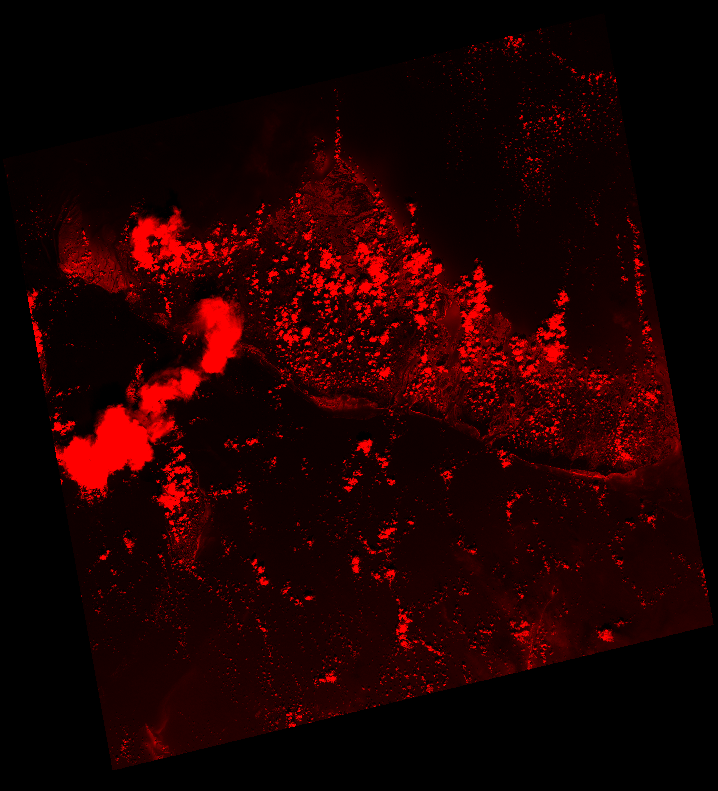

In [16]:
Images.Image(ans)

Compare to the original:

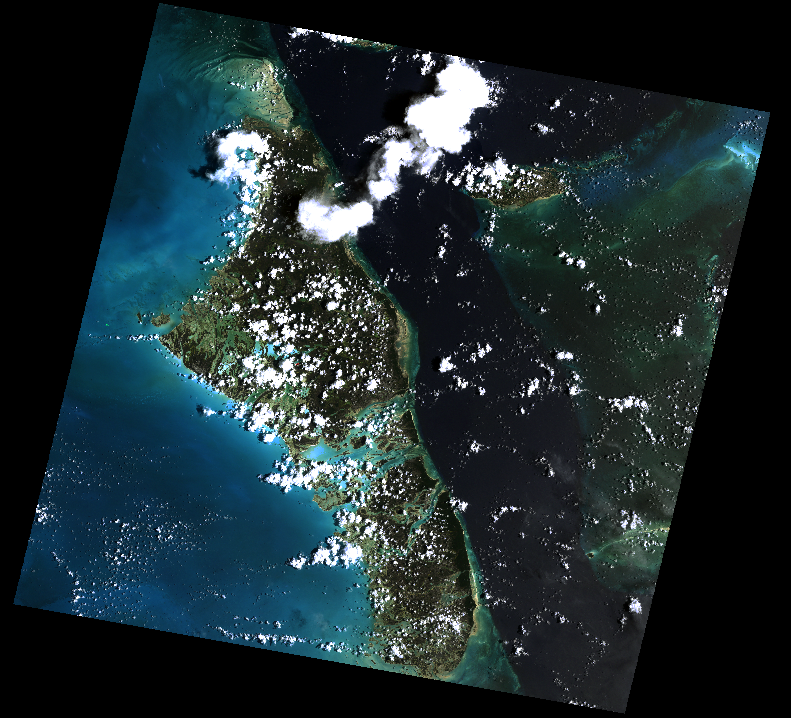

In [17]:
Images.imread("pyrasterio/RGB.byte.tif")

We can also overlay all 3 channels of the RGB dataset, to recover the original image.

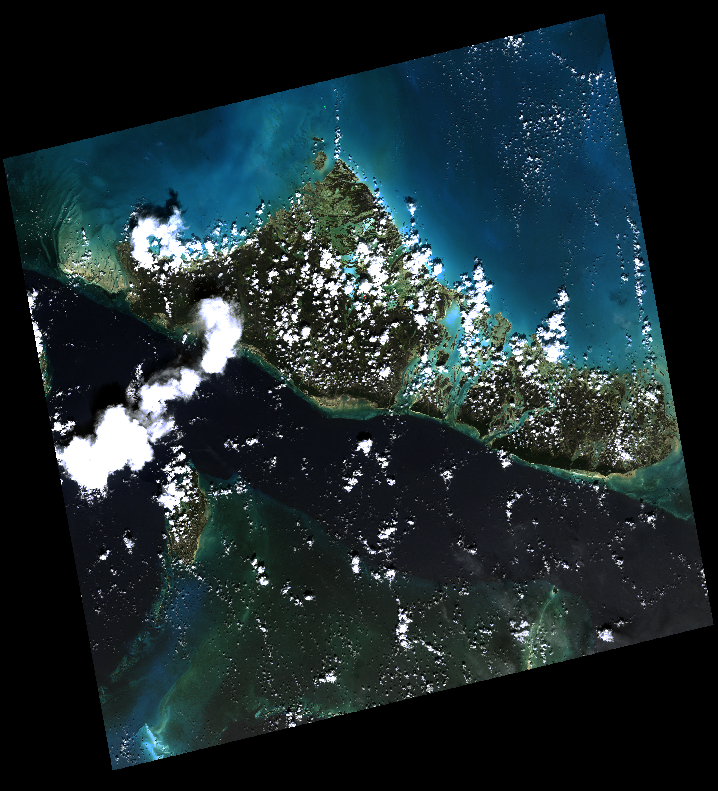

In [18]:
o = Images.Overlay((RasterIO.fetch(raster, 1),
                    RasterIO.fetch(raster, 2),
                    RasterIO.fetch(raster, 3)),
                   (Images.RGB(1,0,0),
                    Images.RGB(0,1,0),
                    Images.RGB(0,0,1)),
                   ((0, 255),(0, 255),(0, 255)))
Images.Image(o)

## Closing a Raster
To close a raster/dataset, call the `closeraster()` method.

In [19]:
RasterIO.closeraster(raster)

Ptr{Void} @0x0000000000000000

After it's closed, data can no longer be read.

In [20]:
RasterIO.fetch(raster, 1)

LoadError: LoadError: Can't read closed raster file
while loading In[20], in expression starting on line 1

## Windowed reading and writing
You can read and write "windows" of raster files. This feature allows you to operate on rasters that are larger than your computers RAM or process chunks of very large rasters in parallel.

### Windows
A window is a view onto a rectangular subset of a raster dataset and is described in rasterio by a pair of range tuples.

    ((row_start, row_stop), (col_start, col_stop))

The first pair contains the indexes of the raster rows at which the window starts and stops. The second contains the indexes of the raster columns at which the window starts and stops. For example,

    ((0, 4), (0, 4))

Specifies a 4 x 4 window at the upper left corner of a raster dataset and

    ((10, 20), (10, 20))

specifies a 10 x 10 window with origin at row 10 and column 10. Use of None for a range value indicates either 0 (in the start position) or the full raster height or width (in the stop position). The window tuple

    ((None, 4), (None, 4))

also specifies a 4 x 4 window at the upper left corner of the raster and

    ((4, None), (4, None))

specifies a rectangular subset with upper left at row 4, column 4 and extending to the lower right corner of the raster dataset.

Using window tuples should feel like using Python's range() and slice() functions. Range() selects a range of numbers from the sequence of all integers and slice() produces a object that can be used in slicing expressions.

### Reading
Here is an example of reading a 100 row x 100 column subset of the rasterio test file.

In [21]:
raster = RasterIO.openraster("pyrasterio/RGB.byte.tif")
w = RasterIO.fetch(raster, 1, 1:100, 1:100)
RasterIO.closeraster(raster)

w

791x718 Array{UInt8,2}:
 0x00  0x00  0x00  0x00  0x00  0x00  …  0x00  0x00  0x00  0x00  0x00  0x00
 0x00  0x00  0x00  0x00  0x00  0x00     0x00  0x00  0x00  0x00  0x00  0x00
 0x00  0x00  0x00  0x00  0x00  0x00     0x00  0x00  0x00  0x00  0x00  0x00
 0x00  0x00  0x00  0x00  0x00  0x00     0x00  0x00  0x00  0x00  0x00  0x00
 0x00  0x00  0x00  0x00  0x00  0x00     0x00  0x00  0x00  0x00  0x00  0x00
 0x00  0x00  0x00  0x00  0x00  0x00  …  0x00  0x00  0x00  0x00  0x00  0x00
 0x00  0x00  0x00  0x00  0x00  0x00     0x00  0x00  0x00  0x00  0x00  0x00
 0x00  0x00  0x00  0x00  0x00  0x00     0x00  0x00  0x00  0x00  0x00  0x00
 0x00  0x00  0x00  0x00  0x00  0x00     0x00  0x00  0x00  0x00  0x00  0x00
 0x00  0x00  0x00  0x00  0x00  0x00     0x00  0x00  0x00  0x00  0x00  0x00
 0x00  0x00  0x00  0x00  0x00  0x00  …  0x00  0x00  0x00  0x00  0x00  0x00
 0x00  0x00  0x00  0x00  0x00  0x00     0x00  0x00  0x00  0x00  0x00  0x00
 0x00  0x00  0x00  0x00  0x00  0x00     0x00  0x00  0x00  0x00  0x00  0x00
 

### Writing
Writing works similarly. The following creates a blank 500 column x 300 row GeoTIFF and plops 37500 pixels with value 127 into a window 30 pixels down from and 50 pixels to the right of the upper left corner of the GeoTIFF.

In [22]:
image = fill(UInt8(127), (150, 250))

raster = RasterIO.createraster("pyrasterio/example.tif",
                                500, # width
                                300, # height
                                1, # number of bands
                                UInt8, # DataType
                                "GTiff") # Drivername

RasterIO.Raster(Ptr{Void} @0x00007ff3cc579e90,500,300,1)

In [23]:
RasterIO.update!(raster,
                 image, # image to "burn" into the raster
                 1, # update band 1
                 30:180, # along (window) xcoords 30 to 180
                 50:300) # along (window) ycoords 30 to 180

150x250 Array{UInt8,2}:
 0x7f  0x7f  0x7f  0x7f  0x7f  0x7f  …  0x7f  0x7f  0x7f  0x7f  0x7f  0x7f
 0x7f  0x7f  0x7f  0x7f  0x7f  0x7f     0x7f  0x7f  0x7f  0x7f  0x7f  0x7f
 0x7f  0x7f  0x7f  0x7f  0x7f  0x7f     0x7f  0x7f  0x7f  0x7f  0x7f  0x7f
 0x7f  0x7f  0x7f  0x7f  0x7f  0x7f     0x7f  0x7f  0x7f  0x7f  0x7f  0x7f
 0x7f  0x7f  0x7f  0x7f  0x7f  0x7f     0x7f  0x7f  0x7f  0x7f  0x7f  0x7f
 0x7f  0x7f  0x7f  0x7f  0x7f  0x7f  …  0x7f  0x7f  0x7f  0x7f  0x7f  0x7f
 0x7f  0x7f  0x7f  0x7f  0x7f  0x7f     0x7f  0x7f  0x7f  0x7f  0x7f  0x7f
 0x7f  0x7f  0x7f  0x7f  0x7f  0x7f     0x7f  0x7f  0x7f  0x7f  0x7f  0x7f
 0x7f  0x7f  0x7f  0x7f  0x7f  0x7f     0x7f  0x7f  0x7f  0x7f  0x7f  0x7f
 0x7f  0x7f  0x7f  0x7f  0x7f  0x7f     0x7f  0x7f  0x7f  0x7f  0x7f  0x7f
 0x7f  0x7f  0x7f  0x7f  0x7f  0x7f  …  0x7f  0x7f  0x7f  0x7f  0x7f  0x7f
 0x7f  0x7f  0x7f  0x7f  0x7f  0x7f     0x7f  0x7f  0x7f  0x7f  0x7f  0x7f
 0x7f  0x7f  0x7f  0x7f  0x7f  0x7f     0x7f  0x7f  0x7f  0x7f  0x7f  0x7f
 

In [24]:
RasterIO.closeraster(raster)

Ptr{Void} @0x0000000000000000

The result:

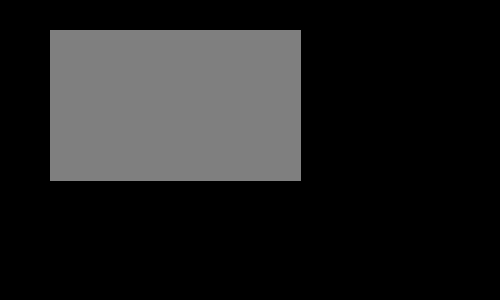

In [25]:
Images.imread("pyrasterio/example.tif")

## Decimation
If the write window is smaller than the data, the data will be decimated. Below, the window is scaled to one third of the source image.

In [26]:
src = RasterIO.openraster("pyrasterio/RGB.byte.tif")

RasterIO.Raster(Ptr{Void} @0x00007ff3cbbd8da0,791,718,3)

In [27]:
dst = RasterIO.createraster("pyrasterio/example2.tif",
                            500, # width
                            300, # height
                            3, # number of bands
                            UInt8, # DataType
                            "GTiff")

In [28]:
rgb = RasterIO.fetch(src, [1,2,3]) # fetch bands 1 - 3
# You can update all 3 bands simultaneously
RasterIO.update!(dst,
                 rgb, # image to "burn" into destination dataset
                 [1,2,3], # indices of the bands to be updated
                 30:269, # along (window) xcoords 30 to 269
                 50:313) # along (window) xcoords 50 to 313

791x718x3 Array{UInt8,3}:
[:, :, 1] =
 0x00  0x00  0x00  0x00  0x00  0x00  …  0x00  0x00  0x00  0x00  0x00  0x00
 0x00  0x00  0x00  0x00  0x00  0x00     0x00  0x00  0x00  0x00  0x00  0x00
 0x00  0x00  0x00  0x00  0x00  0x00     0x00  0x00  0x00  0x00  0x00  0x00
 0x00  0x00  0x00  0x00  0x00  0x00     0x00  0x00  0x00  0x00  0x00  0x00
 0x00  0x00  0x00  0x00  0x00  0x00     0x00  0x00  0x00  0x00  0x00  0x00
 0x00  0x00  0x00  0x00  0x00  0x00  …  0x00  0x00  0x00  0x00  0x00  0x00
 0x00  0x00  0x00  0x00  0x00  0x00     0x00  0x00  0x00  0x00  0x00  0x00
 0x00  0x00  0x00  0x00  0x00  0x00     0x00  0x00  0x00  0x00  0x00  0x00
 0x00  0x00  0x00  0x00  0x00  0x00     0x00  0x00  0x00  0x00  0x00  0x00
 0x00  0x00  0x00  0x00  0x00  0x00     0x00  0x00  0x00  0x00  0x00  0x00
 0x00  0x00  0x00  0x00  0x00  0x00  …  0x00  0x00  0x00  0x00  0x00  0x00
 0x00  0x00  0x00  0x00  0x00  0x00     0x00  0x00  0x00  0x00  0x00  0x00
 0x00  0x00  0x00  0x00  0x00  0x00     0x00  0x00  0x00  0x00

In [29]:
RasterIO.closeraster(dst)

Ptr{Void} @0x0000000000000000

In [30]:
RasterIO.closeraster(src)

Ptr{Void} @0x0000000000000000

And the result:

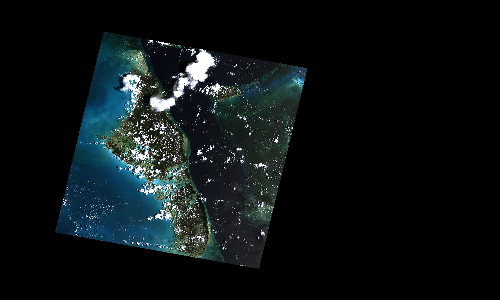

In [31]:
Images.imread("pyrasterio/example2.tif")

Below is an example of reading a raster subset and then writing it into a larger subset that is defined relative to the upper left corner of the destination dataset.

In [32]:
src = RasterIO.openraster("pyrasterio/RGB.byte.tif")

RasterIO.Raster(Ptr{Void} @0x00007ff3cc638740,791,718,3)

In [33]:
dst = RasterIO.createraster("pyrasterio/example3.tif",
                            500, # width
                            300, # height
                            3, # number of bands
                            eltype(rgb), # DataType
                            "GTiff")

RasterIO.Raster(Ptr{Void} @0x00007ff3cc5fae60,500,300,3)

In [34]:
rgb = RasterIO.fetch(src, [1,2,3],
                     350:410,
                     350:450)

791x718x3 Array{UInt8,3}:
[:, :, 1] =
 0x19  0x19  0x19  0x19  0x19  0x19  …  0x4f  0x4f  0x4f  0x4f  0x4f  0x4f
 0x19  0x19  0x19  0x19  0x19  0x19     0x4f  0x4f  0x4f  0x4f  0x4f  0x4f
 0x19  0x19  0x19  0x19  0x19  0x19     0x4f  0x4f  0x4f  0x4f  0x4f  0x4f
 0x19  0x19  0x19  0x19  0x19  0x19     0x4f  0x4f  0x4f  0x4f  0x4f  0x4f
 0x19  0x19  0x19  0x19  0x19  0x19     0x4f  0x4f  0x4f  0x4f  0x4f  0x4f
 0x19  0x19  0x19  0x19  0x19  0x19  …  0x4f  0x4f  0x4f  0x4f  0x4f  0x4f
 0x19  0x19  0x19  0x19  0x19  0x19     0x4f  0x4f  0x4f  0x4f  0x4f  0x4f
 0x19  0x19  0x19  0x19  0x19  0x19     0x4f  0x4f  0x4f  0x4f  0x4f  0x4f
 0x0a  0x0a  0x0a  0x0a  0x0a  0x0a     0x51  0x51  0x51  0x51  0x51  0x51
 0x0a  0x0a  0x0a  0x0a  0x0a  0x0a     0x51  0x51  0x51  0x51  0x51  0x51
 0x0a  0x0a  0x0a  0x0a  0x0a  0x0a  …  0x51  0x51  0x51  0x51  0x51  0x51
 0x0a  0x0a  0x0a  0x0a  0x0a  0x0a     0x51  0x51  0x51  0x51  0x51  0x51
 0x0a  0x0a  0x0a  0x0a  0x0a  0x0a     0x51  0x51  0x51  0x51

In [35]:
RasterIO.update!(dst, rgb, [1,2,3],
                 1:240,
                 1:400)

791x718x3 Array{UInt8,3}:
[:, :, 1] =
 0x19  0x19  0x19  0x19  0x19  0x19  …  0x4f  0x4f  0x4f  0x4f  0x4f  0x4f
 0x19  0x19  0x19  0x19  0x19  0x19     0x4f  0x4f  0x4f  0x4f  0x4f  0x4f
 0x19  0x19  0x19  0x19  0x19  0x19     0x4f  0x4f  0x4f  0x4f  0x4f  0x4f
 0x19  0x19  0x19  0x19  0x19  0x19     0x4f  0x4f  0x4f  0x4f  0x4f  0x4f
 0x19  0x19  0x19  0x19  0x19  0x19     0x4f  0x4f  0x4f  0x4f  0x4f  0x4f
 0x19  0x19  0x19  0x19  0x19  0x19  …  0x4f  0x4f  0x4f  0x4f  0x4f  0x4f
 0x19  0x19  0x19  0x19  0x19  0x19     0x4f  0x4f  0x4f  0x4f  0x4f  0x4f
 0x19  0x19  0x19  0x19  0x19  0x19     0x4f  0x4f  0x4f  0x4f  0x4f  0x4f
 0x0a  0x0a  0x0a  0x0a  0x0a  0x0a     0x51  0x51  0x51  0x51  0x51  0x51
 0x0a  0x0a  0x0a  0x0a  0x0a  0x0a     0x51  0x51  0x51  0x51  0x51  0x51
 0x0a  0x0a  0x0a  0x0a  0x0a  0x0a  …  0x51  0x51  0x51  0x51  0x51  0x51
 0x0a  0x0a  0x0a  0x0a  0x0a  0x0a     0x51  0x51  0x51  0x51  0x51  0x51
 0x0a  0x0a  0x0a  0x0a  0x0a  0x0a     0x51  0x51  0x51  0x51

In [36]:
RasterIO.closeraster(dst)

Ptr{Void} @0x0000000000000000

In [37]:
RasterIO.closeraster(src)

Ptr{Void} @0x0000000000000000

This example clearly demonstrates decimation.

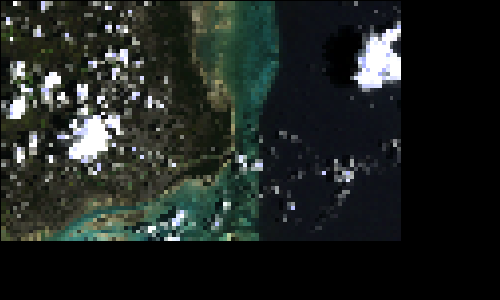

In [38]:
Images.imread("pyrasterio/example3.tif")

# Clean Up

Remove all working/temporary examples

In [39]:
; rm pyrasterio/example*.tif